# Ошибки и исключения

##   Синтаксические ошибки, исключения, что хранит ошибка

Все ошибки делятся на 2 типа:

1. **Синтаксические** - интерпретатор не понимает, что написано.
2. **Исключения** - ошибки, возникающие в процессе выполнения самого кода.

In [1]:
class MyList
    pass

SyntaxError: invalid syntax (<ipython-input-1-58ebc4a76c75>, line 1)

Сначала весь файл проверяется на синтаксические ошибки, и только если их нет, интерпретатор исполняет команды строка за строкой.

In [3]:
print('test')
class MyList
    pass

SyntaxError: invalid syntax (<ipython-input-3-44e051ec0c14>, line 2)

--------

***Исключения***:

`TypeError` - пытаемся сравнить типы, которые сравнивать нельзя.

In [4]:
class EvenLengthMixin:
    def even_length(self):
        return len(self) % 2 == 0

class MyList(list, EvenLengthMixin):
    pass

ml = MyList([1, 'abc', 3, 77, 2, 11])
ml.sort()
print(ml)

TypeError: '<' not supported between instances of 'str' and 'int'

У любой ошибки есть 3 обязательные вещи:
1. Ошибки - это **объекты**, поэтому у любой ошибки есть тип. Тип ошибки может о многом сказать: `NameError` - переменная не определена и т.д.
2. У ошибки есть **дополнительное сообщение**.
3. Ошибка хранит в себе **состояние стека вызовов** на момент, когда была совершена ошибка.

In [6]:
def f():
    x = [1, 2, 3]
    print(x[4])

f()

IndexError: list index out of range

Выше - развернутый **стек вызовов**: 
- сначала вызвали функцию `f()`
- затем внутри функции вызываем `print` - и уже там ошибка

##    try/except

### Типы исключений

In [7]:
x = [1, 2, 'hello', 7]
x.sort()
print(x)

print('I can catch')

TypeError: '<' not supported between instances of 'str' and 'int'

Пусть возникновение ошибки в каком-то месте программы является некритичным, и мы хотим дальше продолжить исполнение кода:

In [8]:
try:
    x = [1, 2, 'hello', 7]
    x.sort()
    print(x)
except TypeError:
    print('TypeError')

print('I can catch')

TypeError
I can catch


-----

In [11]:
def f(x, y):
    try:
        return x / y
    except TypeError:
        print('TypeError')

f(5, [])

TypeError


Следующая ошибка - не ошибка типов:

In [12]:
f(5, 0)

ZeroDivisionError: division by zero

Если внутри `try` блока произошло исключение, которое мы не ловим `except` блоком, тогда это исключение ведет себя так, будто `try` блока не было.

Можно написать еще один `except` блок - `ZeroDivisionError`

Если пишем несколько `except` блоков, то ошибка будет обработана только одним (первым к которому подойдет) из них, остальные не будут исполняться.

---

### Где можно обрабатывать исключения

Ловить исключения можно в любой момент исполнения на стеке:
- либо внутри функции
- либо при вызове функции

In [13]:
def f(x, y):
    try:
        return x / y
    except TypeError:
        print('TypeError')

try:
    f(5, 0)
except ZeroDivisionError:
    print('ZeroDivisionError')

ZeroDivisionError


### Кортежи ошибок

Можно ловить кортежи ошибок:

In [15]:
def f(x, y):
    try:
        return x / y
    except (TypeError, ZeroDivisionError):
        print('Error')

f(5, 0)
f(5, 'aa')

Error
Error


### Объект ошибки

Можно поймать и сам объект ошибки:

In [18]:
def f(x, y):
    try:
        return x / y
    except (TypeError, ZeroDivisionError) as e:
        print('type: ', type(e))
        print('e: ', e)
        print('args: ', e.args, '\n') 
        
f(5, 0)
f(5, 'aa')       

type:  <class 'ZeroDivisionError'>
e:  division by zero
args:  ('division by zero',) 

type:  <class 'TypeError'>
e:  unsupported operand type(s) for /: 'int' and 'str'
args:  ("unsupported operand type(s) for /: 'int' and 'str'",) 



`e.args` - аргументы, с которыми создаем экземпляр класса. Они передаются в конструктор класса, когда мы вызываем ошибку.

---------

### Обработка исключений без указания их типа

Можно исполнить `try/except` блок без указания конкретных типов исключений, которые надо ловить:

In [19]:
def f(x, y):
    try:
        return x / y
    except:
        print('Error')

f(5, 0)
f(5, 'aa')        

Error
Error


-----

### Иерархия ошибок, isinstance(e, ...Error)

Какие механизмы используются, когда пытаемся понять, подходит ли исключение, которое возникло внутри кода, к данному `except` блоку:

In [20]:
try:
    15 / 0
    # e
except ZeroDivisionError: # isinstance(e, ZeroDivisionError) == True
    print('ZeroDivisionError')

ZeroDivisionError


Внутри блока `try` генерируется объект исключений.

`except` проверяет, является ли этот объект экземпляром ошибки.

Все ошибки представляют собой иерархию. `ZeroDivisionError` наследуется от `ArithmeticError`.

In [21]:
print(ZeroDivisionError.mro())

[<class 'ZeroDivisionError'>, <class 'ArithmeticError'>, <class 'Exception'>, <class 'BaseException'>, <class 'object'>]


Ошибки не используют множественное наследование.

Чтобы понять, в какой из `except` блоков мы попадаем, используется `isinstance`.

Не имеет смысла проверять наследника внутри одного `except` блока после предка в `except` блоке выше, так как исключение может быть целиком обработано одним блоком.

---------

### Ключевые слова: else, finally

**Ключевые слова**

`else` - внутри `try` блока не возникло никакого исключения, но мы все равно хотим то-то сделать.

`finally` - запускается в любом случае, вне зависимости от того, обработали ли мы исключение, или даже не смогли обработать исключение.

In [23]:
def divide(x, y):
    try:
        result = x / y
    except ZeroDivisionError:
        print('ZeroDivisionError')
    else:
        print('Result = ', result)
    finally:
        print('finally\n')
        
divide(2, 1)
divide(2, 0)
divide(2, [])

Result =  2.0
finally

ZeroDivisionError
finally

finally



TypeError: unsupported operand type(s) for /: 'int' and 'list'

## Задача 1

Вашей программе будет доступна функция `foo`, которая может бросать исключения.

Вам необходимо написать код, который запускает эту функцию, затем ловит исключения `ArithmeticError`, `AssertionError`, `ZeroDivisionError` и выводит имя пойманного исключения.

Пример решения, которое вы должны отправить на проверку.

```
try:
    foo()
except Exception:
    print("Exception")
except BaseException:
    print("BaseException")
```

In [2]:
def foo():
    pass

try:
    foo()

except ZeroDivisionError:
    print('ZeroDivisionError')

except ArithmeticError:
    print('ArithmeticError')
    
except AssertionError:
    print('AssertionError')

## Задача 2

Вам дано описание наследования классов исключений в следующем формате.

`<имя исключения 1> : <имя исключения 2> <имя исключения 3> ... <имя исключения k>`

Это означает, что `исключение 1` наследуется от `исключения 2`, `исключения 3`, и т. д.

Или эквивалентно записи:

```
class Error1(Error2, Error3 ... ErrorK):
    pass
```

Антон написал код, который выглядит следующим образом.

```
try:
   foo()
except <имя 1>:
   print("<имя 1>")
except <имя 2>:
   print("<имя 2>")
...
```
Костя посмотрел на этот код и указал Антону на то, что некоторые исключения можно не ловить, так как ранее в коде будет пойман их предок. Но Антон не помнит какие исключения наследуются от каких. Помогите ему выйти из неловкого положения и напишите программу, которая будет определять обработку каких исключений можно удалить из кода.

**Формат входных данных**:

В первой строке входных данных содержится целое число `n` - число классов исключений.

В следующих `n` строках содержится описание наследования классов. В `i-й` строке указано от каких классов наследуется `i-й` класс. Обратите внимание, что класс может ни от кого не наследоваться. Гарантируется, что класс не наследуется сам от себя (прямо или косвенно), что класс не наследуется явно от одного класса более одного раза.

В следующей строке содержится число `m` - количество обрабатываемых исключений.
Следующие `m` строк содержат имена исключений в том порядке, в каком они были написаны у Антона в коде.
Гарантируется, что никакое исключение не обрабатывается дважды.

**Формат выходных данных**:

Выведите в отдельной строке имя каждого исключения, обработку которого можно удалить из кода, не изменив при этом поведение программы. Имена следует выводить в том же порядке, в котором они идут во входных данных.

In [6]:
base = {}
already_checked = set()

def test(child):
    try:
        if base[child] == None:
            return 'Not to delete'
    except KeyError:
        return 'Not to delete'
    
    for cl in base[child]:
        if cl in already_checked or child in already_checked:
            return 'Delete'

    for cl in base[child]:
        if test(cl) == 'Delete':
            return 'Delete'

    return 'Not to delete'

for com in [input().split() for i in range(int(input()))]:
    base[com[0]] = None if len(com) == 1 else com[2:len(com)]

trig = 0
for com in [input() for i in range(int(input()))]:
    if test(com) == 'Delete':
        trig +=1
        if trig == 1:
            print('----------')
        print(com)
    already_checked.add(com)

4
ArithmeticError
ZeroDivisionError : ArithmeticError
OSError
FileNotFoundError : OSError
4
ZeroDivisionError
OSError
ArithmeticError
FileNotFoundError
----------
FileNotFoundError


##   raise, создание класса исключений

Мы можем сами решать, когда в программе произошла ошибка, которую нужно как-то обработать.

In [7]:
def greet(name):
    if name[0].isupper():
        return "Hello, " + name
    else:
        raise ValueError(name + ' is inappropriate name')
        
print(greet('Anton'))
print(greet('anton'))

Hello, Anton


ValueError: anton is inappropriate name

`ValueError` используется, когда аргумент, передаваемый в функцию, по типу подходит, но по значению - нет.

In [1]:
def greet(name):
    if name[0].isupper():
        return "Hello, " + name
    else:
        raise ValueError(name + ' is inappropriate name')
        
while True:
    try:
        name = input('Please, enter ur name: ')
        greeting = greet(name)
        print(greeting)
    except ValueError:
        print('Please, try again \n')
    else:
        break

Please, enter ur name: beatorice
Please, try again 

Please, enter ur name: Beatorice
Hello, Beatorice


Все исключения, которые бросаем с помощью `raise` и ловим с помощью `except` - экземпляры класса `BaseException` - он описывает все исключения.

-----

Пусть нет такого класса исключений, которые хорошо бы описывали нашу ошибку. Тогда можно написать свой класс исключений:

In [11]:
class BadName(Exception):
    pass

def greet(name):
    if name[0].isupper():
        return "Hello, " + name
    else:
        raise BadName(name + ' is inappropriate name')
        
print(greet('anton'))

BadName: anton is inappropriate name

## Задача 3

Реализуйте класс `PositiveList`, отнаследовав его от класса `list`, для хранения положительных целых чисел.

Также реализуйте новое исключение `NonPositiveError`.

В классе `PositiveList` переопределите метод `append(self, x)` таким образом, чтобы при попытке добавить неположительное целое число бросалось исключение `NonPositiveError` и число не добавлялось, а при попытке добавить положительное целое число, число добавлялось бы как в стандартный `list`.

В данной задаче гарантируется, что в качестве аргумента `x` метода `append` всегда будет передаваться целое число.

Примечание:
Положительными считаются числа, **строго большие** нуля.

In [12]:
class NonPositiveError(Exception):
    pass

class PositiveList(list):
    def append(self, x):
        if x > 0:
            super(PositiveList, self).append(x)
        else:
            raise NonPositiveError()        

In [13]:
obj = PositiveList()
obj.append(1)

In [14]:
obj.append(-12)

NonPositiveError: 

# Работа с кодом: модули и импорт

##    Кастомные модули, его аттрибуты, исполнение модуля

Иногда нужно использовать функции/классы/переменные, которые мы объявили в другом файле. Для этого существует система модулей.

Мы поместили некоторые ф-ции в один файл, который мы и называем модулем.

Когда мы пишем:
```
import filename
```
мы берем целиком этот файл и полностью его исполняем. Те имена в неймспейсе, которые останутся после использования модуля, затем можно импортировать.

Имена в неймспейсе модуля доступны в качестве аттрибутов модуля.

##    \_\_name\_\_ внутри и вне модуля

Код модуля исполняется, когда мы его импортируем. Это может вызвать определенные проблемы.

Пример: код модуля может содержать не только определение классов/функций, которые мы бы и хотели импортировать.

Нужно разграничить тот код, который будем исполнять при импорте, и тот, который исполнять не будем.

Для этого внутри модуля всегда доступно глобальное имя `name`

In [15]:
print(__name__)

def fib(k):
    if k == 0 or k == 1:
        return 1
    else:
        return fib(k - 1) + fib(k - 2)

print(fib(31))

__main__
2178309


Но если мы проимпортируем этот файл из другого файла, то во время исполнения `print(__name__)` выдаст имя модуля `filename`

Поэтому можно оборачивать код, который мы хотим, чтобы выполнялся **только** внутри самого файла (**не при импорте**), с помощью:
```
if __name__ == "__main__":
    ...
```

In [1]:
def fib(k):
    if k == 0 or k == 1:
        return 1
    else:
        return fib(k - 1) + fib(k - 2)

if __name__ == "__main__":
    print(__name__)
    print(fib(31))

__main__
2178309


Таким образом при импортировании исполнится только код, который находится выше оператора `if`, потому что когда мы импортируем, имя текущего модуля будет равно имени файла `filename`.

##    sys.modules, система import, пакеты

Система *import* в Python:

Код исполняется при импортировании модуля, но делаем мы это единожды. Все глобальные имена внутри неймспейса модуля закрепляются за объектом-модулем. 

Если второй раз напишем import, то мы переиспользуем объект.

Существует объект *sys.modules* - обычный словарь:
- ключи - имена модулей;
- значения - объекты модулей.

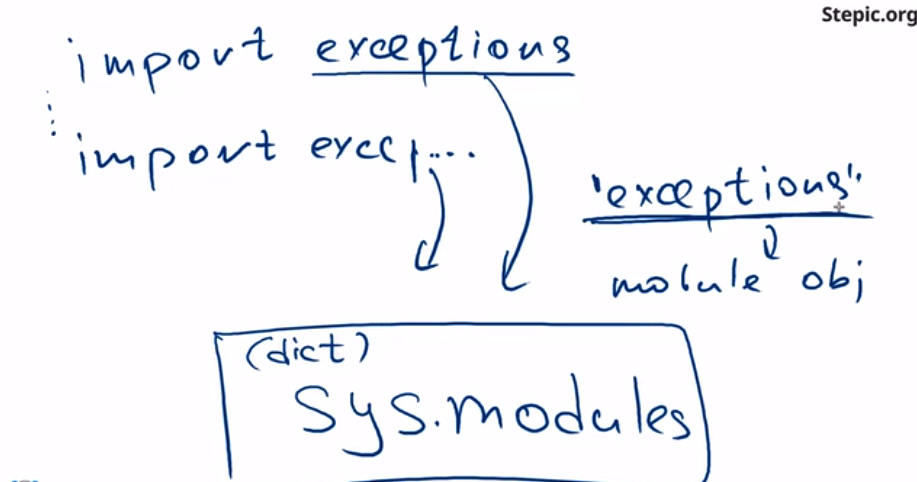

Сначала проверяем, есть ли ключ `exceptions`, не заимпортировался ли он уже. Если нет - исполняем модуль, создаем для него *module object*, обновляем словарь.

При повторном импортировании там уже будет ключ нашего модуля.

Код модуля при повторном импортировании не исполняется, id модуля остается неизменным.

In [5]:
import sys

print(type(sys.modules), '\n')
sys.modules

<class 'dict'> 



{'builtins': <module 'builtins' (built-in)>,
 'sys': <module 'sys' (built-in)>,
 '_frozen_importlib': <module 'importlib._bootstrap' (frozen)>,
 '_imp': <module '_imp' (built-in)>,
 '_warnings': <module '_warnings' (built-in)>,
 '_thread': <module '_thread' (built-in)>,
 '_weakref': <module '_weakref' (built-in)>,
 '_frozen_importlib_external': <module 'importlib._bootstrap_external' (frozen)>,
 '_io': <module 'io' (built-in)>,
 'marshal': <module 'marshal' (built-in)>,
 'nt': <module 'nt' (built-in)>,
 'winreg': <module 'winreg' (built-in)>,
 'zipimport': <module 'zipimport' (built-in)>,
 'encodings': <module 'encodings' from 'C:\\Users\\bruenor\\Anaconda3\\lib\\encodings\\__init__.py'>,
 'codecs': <module 'codecs' from 'C:\\Users\\bruenor\\Anaconda3\\lib\\codecs.py'>,
 '_codecs': <module '_codecs' (built-in)>,
 'encodings.aliases': <module 'encodings.aliases' from 'C:\\Users\\bruenor\\Anaconda3\\lib\\encodings\\aliases.py'>,
 'encodings.utf_8': <module 'encodings.utf_8' from 'C:\\Use

Как мы ищем имя модуля, если мы не нашли его в `sys.modules`?

Тогда мы ищем файл с расширением `.py` в текущей директории. Если и там нет - ищем во внешней библиотеке.

In [6]:
import sys

for path in sys.path:
    print(path)

C:\Users\bruenor\Anaconda3\python36.zip
C:\Users\bruenor\Anaconda3\DLLs
C:\Users\bruenor\Anaconda3\lib
C:\Users\bruenor\Anaconda3

C:\Users\bruenor\Anaconda3\lib\site-packages
C:\Users\bruenor\Anaconda3\lib\site-packages\pytesseract-0.1.7-py3.6.egg
C:\Users\bruenor\Anaconda3\lib\site-packages\win32
C:\Users\bruenor\Anaconda3\lib\site-packages\win32\lib
C:\Users\bruenor\Anaconda3\lib\site-packages\Pythonwin
C:\Users\bruenor\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\bruenor\.ipython


Все модули представлены папками. Эти папки называются **пакетами**.

**Пакет** - удобное представление некоторого числа файлов в виде одного модуля.

Интерпретатор определяет, является ли папка пакетом, по нахождению внутри папки файла `__init__.py`.

Если он там находится, то при импорте он и исполняется.

## Задача 1

В первой строке дано три числа, соответствующие некоторой дате `date` -- год, месяц и день.

Во второй строке дано одно число `days` -- число дней.

Вычислите и выведите год, месяц и день даты, которая наступит, когда с момента исходной даты `date` пройдет число дней, равное `days`.

**Примечание:**
Для решения этой задачи используйте стандартный модуль `datetime`.
Вам будут полезны класс `datetime.date` для хранения даты и класс `datetime.timedelta` для прибавления дней к дате.

*Sample Input 1:*
```
2016 4 20
14
```
*Sample Output 1:*
```
2016 5 4
```

In [26]:
import datetime

year, month, day = map(int, input().split())

date = datetime.date(year, month, day)
delta = datetime.timedelta(int(input()))

new_date = date + delta

print(new_date.year, new_date.month, new_date.day)

2016 4 20
14


(2016, 5, 4)

##   Выборочный импорт имен из модуля

Можно также импортировать не весь модуль, а только какие-то имена из него.

In [27]:
from numpy import asarray as ar

Можно также импортировать все имена из модуля:

In [ ]:
from module import *b

Это не рекомендуется, т.к. если моудуль большой, то какие-то имена могут пересекаться с уже используемыми.

Через * можно импортировать не все имена. 
Можно определить конструкцию `all`, в которой определяем нужные для импорта имена.

Даже если мы НЕ определим `all`, то мы не импортируем имена, начинающиеся с `_`

In [30]:
__all__ = ['name1', 'name2']
# Другие имена будут недоступны
# из другого файла.

_GREETING = 'Hello'
# Такое имя тоже не импортируется

## Задача 2

Алиса владеет интересной информацией, которую хочет заполучить Боб.

Алиса умна, поэтому она хранит свою информацию в зашифрованном файле.

У Алисы плохая память, поэтому она хранит все свои пароли в открытом виде в текстовом файле.

Бобу удалось завладеть зашифрованным файлом с интересной информацией и файлом с паролями, но он не смог понять какой из паролей ему нужен. Помогите ему решить эту проблему.

Алиса зашифровала свою информацию с помощью библиотеки `simple-crypt`.
Она представила информацию в виде строки, и затем записала в бинарный файл результат работы метода simplecrypt.encrypt.

Вам необходимо установить библиотеку `simple-crypt`, и с помощью метода `simplecrypt.decrypt` узнать, какой из паролей служит ключом для расшифровки файла с интересной информацией.

Ответом для данной задачи служит расшифрованная интересная информация Алисы.

In [ ]:
import simplecrypt
from datetime import datetime

start_time = datetime.now()

path_encrypted = "2.2/task-1/encrypted.bin"
path_passwords = "2.2/task-1/passwords.txt"

with open(path_encrypted, "rb") as data_file:
    encrypted = data_file.read()

pw_file = open(path_passwords, 'r')
passwords = [line.strip() for line in pw_file]

for password in passwords:
    try:
        decrypted = simplecrypt.decrypt(password, encrypted)
        break
    except simplecrypt.DecryptionException:
        pass

answer_file = open('2.2/task-1/answer.txt', 'w')
answer_file.write(decrypted.decode('utf8'))

print(datetime.now() - start_time)

# Итераторы и генераторы

##    Итераторы внутри **for**

Что делает цикл `for`, когда используем со стандартными типами данных:

In [2]:
lst = [1, 2, 3, 4, 5, 6]

book = {
    'title': 'The Langoliers',
    'author': 'Stephen King',
    'year_published': 1990
}

string = 'Hello, World!'

Перебираем элементы списка:

In [3]:
for i in lst:
    print(i)

1
2
3
4
5
6


Перебираем ключи словаря:

In [4]:
for i in book:
    print(i)

title
author
year_published


Перебираем символы строки:

In [5]:
for i in string:
    print(i)

H
e
l
l
o
,
 
W
o
r
l
d
!


--------

Такое поведение понятно - цикл `for` перебирает элементы множества.

Но как интерпретатор узнает, какие элементы лежат в множестве? Почему имено ключи, почему именно элементы для списка и т.д.

Для этого есть **итераторы**.

Если хотим перебирать элементы какого-то объекта `Х` с помощью `for`, то необходимо, чтобы у объекта `Х` был итератор.

**Итератор** - объект-перечислитель. У итератора можно спросить, какой элемент является следующим в объекте `Х`.

Если элементов в объекте больше нет, то он бросает ошибку `StopIteration`.

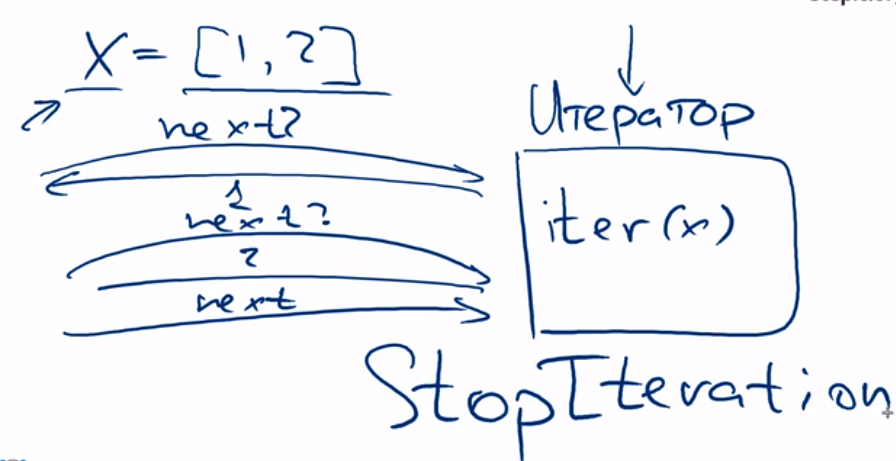

In [8]:
iterator = iter(book)
print(next(iterator))
print(next(iterator))
print(next(iterator))
next(iterator)

title
author
year_published


StopIteration: 

При использовании цикла `for` происходит что-то подобное:

In [9]:
it = iter(book)
while True:
    try:
        i = next(it)
        # Тело цикла for
        print(i)
    except StopIteration:
        break

title
author
year_published


##    Класс итератора, итерируемые объекты

Напишем самый простой объект итератора. 

Когда запрашиваем следующий элемент, объект будет возвращать случайное число из [0, 1]

In [10]:
class RandomIterator:
    pass

x = RandomIterator()
print(next(x))

TypeError: 'RandomIterator' object is not an iterator

Чтобы экземпляр класса стал итератором, необходимо в классе определить метод `__next__`

In [11]:
class RandomIterator:
    def __next__(self):
        return 0

x = RandomIterator()
print(next(x))

0


`next(x) == x.__next_()`

`x` - итератор, когда у него есть метод `__next__`

In [17]:
from random import random

class RandomIterator:
    def __next__(self):
        return random()

x = RandomIterator()
print(next(x))

0.706609390969508


Такой итератор генерирует бесконечную последовательность, т.к. он не бросает ошибку `StopIteration`

In [18]:
from random import random

class RandomIterator:
    def __init__(self, k):
        # К-во случайных чисел, которое перебирает итератор
        self.k = k
        # К-во уже перечисленных итератором чисел
        self.i = 0 

    def __next__(self):
        if self.i < self.k:
            self.i += 1
            return random()
        else:
            raise StopIteration

x = RandomIterator(3)
for i in range(4):
    print(next(x))

0.5797770309316919
0.17188895667399007
0.3033865347909781


StopIteration: 

Можем ли мы его сразу использовать в цикле `for`?

Для этого мы должны уметь вызывать ф-цию `__iter__` у объекта `Х`, которая возвращает экземпляр итератора.

In [19]:
iter(x)

TypeError: 'RandomIterator' object is not iterable

- В случае с итераторами `__iter__` возвращает self. Это если мы хотим сделать и итератор, и одновременно чтобы по нему можно было итерироваться. Но лучше эти понятия разграничивать - реализовать в итераторе `__next__`, а в классе, по экземплярам которым хотим итерироваться - `__iter__`
- В случае с классами, которые мы хотим перебирать, мы возвращаем экземпляр итератора.

In [21]:
from random import random

class RandomIterator:
    def __init__(self, k):
        # К-во случайных чисел, которое перебирает итератор
        self.k = k
        # К-во уже перечисленных итератором чисел
        self.i = 0 
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.i < self.k:
            self.i += 1
            return random()
        else:
            raise StopIteration

for x in RandomIterator(5):
    print(x)

0.3307875763562399
0.05941761164712778
0.38583029893282306
0.11299555188811128
0.8490904312008064


--------------------------------------

1. Для того, чтобы объект можно было проитерировать (перечислить его элементы), у него должен быть определен метод `__iter__`, который возвращает итератор.
2. Для того, чтобы объект являлся итератором, у него должен быть определен метод `__next__`

In [22]:
class DoubleElementListIterator:
    def __init__(self, lst):
        self.lst = lst
        self.i = 0
    
    def __next__(self):
        if self.i < len(self.lst):
            self.i += 2
            return self.lst[self.i - 2], self.lst[self.i - 1]
        else:
            raise StopIteration

class MyList(list):
    def __iter__(self):
        return DoubleElementListIterator(self)

Каждый раз, когда итерируемся по объекту класса *MyList*, перебираем элементы парами.

In [23]:
for pair in MyList([1, 2, 3, 4]):
    print(pair)

(1, 2)
(3, 4)


Но если передать в конструктор нечетное число элементов, он сломается при выводе последней пары.

Тем не менее мы сами определили поведение вывода с помощью цикла **for**.

In [25]:
for pair in MyList([1, 2, 3, 4, 5]):
    print(pair)

(1, 2)
(3, 4)


IndexError: list index out of range

Метод `__iter__()` запускается один раз при создании экземпляра класса *MyList*, и в этот момент этот созданный экземпляр становится "итерируемым" (интерпретатор запоминает все, что ему нужно для работы про этот объект). 

Дальше вы уже работаете с этим экземпляром и все что вы делаете, в том числе итерируетесь по нему (вызываете метод `__next__`), связано именно с этим экземпляром. При создании нового экземпляра `__iter__` будет запущен еще раз, но этот вызов будет связан именно с этим новым экземпляром и никак не повлияет на счетчики ранее созданных экземпляров.

!!! НО ИМЕЙТЕ В ВИДУ !!! 

Если класс итерируемый `(__iter__)` И ОН ЖЕ является итератором `(__next__)`, то итерироваться по элементам объекта этого класса возможно будет только ОДИН раз.

##    Генераторы, yield, return в генераторе

Чтобы написать итератор, нужно использовать классы. Это достаточно сложно, и даже для простых задач нужно довольно много кода. 

Можно ли сделать это проще?

**Генераторы** - функции, где вместо `return` используется `yield`.

Вместо того, чтобы значение возвращать, она будет генерировать следующее значение.

In [26]:
from random import random

class RandomIterator:
    def __init__(self, k):
        # К-во случайных чисел, которое перебирает итератор
        self.k = k
        # К-во уже перечисленных итератором чисел
        self.i = 0 
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.i < self.k:
            self.i += 1
            return random()
        else:
            raise StopIteration
            
def random_generator(k):
    for i in range(k):
        yield random()

Отличие генератора от обычной функции - с помощью `yield`возвращаем значение из функции сразу несколько раз, а спрашивать, какое именно значение будет следующим, будем именно с помощью функции `next`

Интерпретатор смотрит сразу на все тело функции.

Если он видит в теле функции хоть одно `yield` то он понимает, что эта функция - генератор.

Вызов генератора ведет себя не так, как вызов обычной функции.

In [27]:
gen = random_generator(3)
print(type(gen))

<class 'generator'>


`yield` возвращает объект-генератор. 

Он знает целиком все тело функции, и исполнение ее тела начинается только тогда, когда мы попросим у генератора следующий элемент.

Когда мы его просим, то он начинает с самого начала исполнение функции, до первого ключевого слова `yield`.

Встречает и возвращает значение наружу - туда, где мы вызвали функцию `next`.

Когда мы возвращаем значение, мы также запоминаем все состояние функции, чтобы при вызове следующего `next` мы продолжили исполнение не с начала функции, а с того места, где остановились.

Если в какой-то момент мы не найдем `yield`, то бросаем ошибку `StopIteration`.

In [28]:
def simple_gen():
    print('Checkpoint 1')
    yield 1
    print('Checkpoint 2')
    yield 2
    print('Checkpoint 3')

gen = simple_gen()
x = next(gen)
print(x)
y = next(gen)
print(y)
z = next(gen)

Checkpoint 1
1
Checkpoint 2
2
Checkpoint 3


StopIteration: 

С помощью генераторов реализуется концепция **отложенного исполнения** - мы продолжим исполнение функции лишь тогда, когда нам понадобится следующее значение.

In [29]:
from random import random

class RandomIterator:
    def __init__(self, k):
        # К-во случайных чисел, которое перебирает итератор
        self.k = k
        # К-во уже перечисленных итератором чисел
        self.i = 0 
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.i < self.k:
            self.i += 1
            return random()
        else:
            raise StopIteration
            
def random_generator(k):
    for i in range(k):
        yield random()

Функция `random_generator(k)` *k* раз возвращает случайное значение.

Это то же самое, что и делал большой класс `RandomIterator`

In [30]:
gen = random_generator(3)

for i in gen:
    print(i)

0.3480898722350839
0.3183538008491692
0.7910409713698039


Генератор - это удобный синтаксис для написания итераторов.

Вместо того, чтобы писать классы с реализацией `iter` и `next`, можно писать маленькие функции.

`yield` дает понять, что функция производит несколько значений, которые нужно вернуть из функции. 

--------------

Если мы используем `return` внутри генератора:

In [33]:
def simple_gen():
    print('Checkpoint 1')
    yield 1
    print('Checkpoint 2')
    return
    yield 2
    print('Checkpoint 3')

gen = simple_gen()
x = next(gen)
print(x)
y = next(gen)
print(y)
z = next(gen)

Checkpoint 1
1
Checkpoint 2


StopIteration: 

Генератор - это та же функция, и если он дошел до конца тела (или где `return`), то он понимает, что больше не может встретить `yield`, и бросает ошибку `StopIteration`.

Если мы что-то передадим в `return`, то передаваемое значение будет использовано как сообщение внутри ошибки `StopIteration`.

In [34]:
def simple_gen():
    print('Checkpoint 1')
    yield 1
    print('Checkpoint 2')
    return 'No more elements'
    yield 2
    print('Checkpoint 3')

gen = simple_gen()
x = next(gen)
print(x)
y = next(gen)
print(y)
z = next(gen)

Checkpoint 1
1
Checkpoint 2


StopIteration: No more elements

Таким образом, генераторы - удобный синтаксис для написания итераторов.

Важно понимать, что исполнение тела функции происходит лишь при вызове `next` - от одного `yield` до следующего.

## Задача 1

Одним из самых часто используемых классов в Python является класс `filter`. Он принимает в конструкторе два аргумента `a`и `f` – последовательность и функцию, и позволяет проитерироваться только по таким элементам `x` из последовательности `a`, что `f(x) == True`. Будем говорить, что в этом случае функция `f` допускает элемент `x`, а элемент `x` является допущенным.

В данной задаче мы просим вас реализовать класс `multifilter`, который будет выполнять ту же функцию, что и стандартный класс `filter`, но будет использовать не одну функцию, а несколько.

Решение о допуске элемента будет приниматься на основании того, сколько функций допускают этот элемент, и сколько не допускают. Обозначим эти количества за `pos` и `neg`.

Введем понятие *решающей функции* – это функция, которая принимает два аргумента – количества `pos` и `neg`, и возвращает `True`, если элемент допущен, и `False` иначе.

Рассмотрим процесс допуска подробнее на следующем примере.

`a = [1, 2, 3]`


`f2(x) = x % 2 == 0 # возвращает True, если x делится на 2
f3(x) = x % 3 == 0
judge_any(pos, neg) = pos >= 1 # возвращает True, если хотя бы одна функция допускает элемент`

Таким образом, получили последовательность допущенных элементов `[2, 3]`.

Класс должен обладать следующей структурой:

```
class multifilter:
    def judge_half(pos, neg):
        # допускает элемент, если его допускает хотя бы половина фукнций (pos >= neg)

    def judge_any(pos, neg):
        # допускает элемент, если его допускает хотя бы одна функция (pos >= 1)

    def judge_all(pos, neg):
        # допускает элемент, если его допускают все функции (neg == 0)

    def __init__(self, iterable, *funcs, judge=judge_any):
        # iterable - исходная последовательность
        # funcs - допускающие функции
        # judge - решающая функция

    def __iter__(self):
        # возвращает итератор по результирующей последовательности
```

In [35]:
class multifilter:
    def judge_half(pos, neg):
        return pos >= neg

    def judge_any(pos, neg):
        return pos >= 1

    def judge_all(pos, neg):
        return neg == 0

    def __init__(self, iterable, *funcs, judge=judge_any):
        self.iterable = iterable
        self.funcs = funcs
        self.judge = judge

    def __iter__(self):
        for element in self.iterable:
            pos, neg = 0, 0
            for func in self.funcs:
                if func(element):
                    pos += 1
                else:
                    neg += 1
            if self.judge(pos, neg):
                yield element

## Задача 1 - через \_\_iter\_\_ и \_\_next\_\_

In [36]:
# Реализация итератора и итерируемого класса
class MyIterator:
    def __init__(self, iterable):
        self.iterable = iterable
        self.index = 0

    def __next__(self):
        if self.index < len(self.iterable):
            self.index += 1
            return self.iterable[self.index - 1]
        raise StopIteration

class MyList:
    def __init__(self, list):
        self.list = list

    def __iter__(self):
        return MyIterator(self.list)

l = MyList([1, 2, 3, 4, 5])
print(type(l))
for i in l:
    print(i)

<class '__main__.MyList'>
1
2
3
4
5


In [ ]:
# Класс одновременно и итератор, и итерируемый
# Выдает для элементов, неподходящих к условию, возвращает None
class multifilter:
    def judge_half(self, pos, neg):
        return pos >= neg

    def judge_any(self, pos, neg):
        return pos > 0

    def judge_all(self, pos, neg):
        return neg == 0

    def __init__(self, iterable, *funcs, judge=judge_any):
        self.iterable = iterable
        self.funcs = funcs
        self.judge = judge
        self.index = 0

    def __next__(self):
        if self.index < len(self.iterable):
            pos, neg = 0, 0
            self.index += 1
            element = self.iterable[self.index - 1]
            for func in self.funcs:
                if func(element):
                    pos += 1
                else:
                    neg += 1
            if self.judge(self, pos, neg):
                return element
        else:
            raise StopIteration

    def __iter__(self):
        return self

In [ ]:
# Используем итератор, который вшит в получаемый список элементов
# None не возвращается
class multifilter:
    def judge_half(self, pos, neg):
        return pos >= neg

    def judge_any(self, pos, neg):
        return pos > 0

    def judge_all(self, pos, neg):
        return neg == 0

    def __init__(self, iterable, *funcs, judge=judge_any):
        self.iterator = iter(iterable)
        self.funcs = funcs
        self.judge = judge

    def __next__(self):
        while True:
            elem = next(self.iterator)
            pos, neg = 0, 0
            for func in self.funcs:
                if func(elem):
                    pos += 1
                else:
                    neg += 1
            if self.judge(self, pos, neg):
                return elem

    def __iter__(self):
        return self

## Задача 2

Целое положительное число называется простым, если оно имеет ровно два различных делителя, то есть делится только на единицу и на само себя.

Например, число 2 является простым, так как делится только на 1 и 2. Также простыми являются, например, числа 3, 5, 31, и еще бесконечно много чисел.

Число 4, например, не является простым, так как имеет три делителя – 1, 2, 4. Также простым не является число 1, так как оно имеет ровно один делитель – 1.

Реализуйте функцию-генератор `primes`, которая будет генерировать простые числа в порядке возрастания, начиная с числа 2.

In [50]:
import itertools
from math import sqrt, ceil

def primes():
    a = 1
    while True:
        a += 1
        prime_check = True
        for i in range(2, ceil(sqrt(a))):
            if a % i == 0:
                prime_check = False
                break
        if prime_check:
            yield a

print(list(itertools.takewhile(lambda x : x <= 31, primes())))
# [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]

[2, 3, 4, 5, 7, 9, 11, 13, 17, 19, 23, 25, 29, 31]


##     List comprehensions

List Comprehension - лаконичный синтаксис для создания списков.

In [51]:
x = [-2, -1, 0, 1, 2]
y = []

for i in x:
    y.append(i*i)
print(y)

[4, 1, 0, 1, 4]


Но можно объявить содержимое списка прямо внутри списка:

In [52]:
y = [i * i for i in x]
y

[4, 1, 0, 1, 4]

Можно использовать внутри и оператор `if`:

In [54]:
y = [i * i for i in x if i > 0]
y

[1, 4]

In [55]:
z = [(x, y) for x in range(3) for y in range(3) if y >= x]
z

[(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)]

In [56]:
z = []
for x in range(3):
    for y in range(3):
        if y >= x:
            z.append((x, y))
z

[(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 2)]

Если мы поместим такую конструкцию в круглые скобки вместо квадратных, то мы получим генератор, который будет перебирать подходящие под условия объекты.

In [57]:
z = ((x, y) for x in range(3) for y in range(3) if y >= x)
print(z)
print(z.__next__())

<generator object <genexpr> at 0x000001D9F75D1FC0>
(0, 0)


In [58]:
print(next(z))

(0, 1)


# Работа с файловой системой и файлами

##    Режимы открытия файлов, методы считывания

Рассматриваем 2 типа файлов:
1. **Текстовые** - содержимое является текстом. (код программ, *.txt, .html*)
2. **Бинарные/двоичные** - содержимое нельзя интерпретировать в качестве текста. (*.mp3, .jpg, .gif,...*)

Для любого популярного бинарного формата файлов есть специальные библиотеки.

In [10]:
path = '2.4 File system and files/2.4.1/'

f = open(path + 'test.txt', 'r')
x = f.read(5)
y = f.read()
print(x, '\n')
print(y)
f.close()

First 

 Line
Second Line
Third Line


Режимы открытия файлов:
- *r (read)* - открыть для чтения (по умолчанию)
- *w (write)* - открыть для записи, содержимое файла стирается
- *a (append)* - открыть для записи, запись ведется в конец
- *b (binary)* - открыть в бинарном формате
- *t (text)* - открыть в текстовом формате (по умолчанию)
- *r+* - открыть для чтения и записи
- *w+* - открыть для чтения и записи, содержимое файла стирается

Функция `open` возвращает `file object`, благодаря нему происходит работа с файлами.

`File object` нужно закрывать после работы, т.к. нужно освобождать системные ресурсы.

Символ переноса строки - также символ:

In [12]:
f = open(path + 'test.txt', 'r')
x = f.read()
print(repr(x))
f.close()

'First Line\nSecond Line\nThird Line'


Символ разделителя строки в разных ОС может быть разный.

Чтобы мы могли разделить текст по строкам вне зависимости от этого, можно использовать метод `splitlines`:

In [13]:
f = open(path + 'test.txt', 'r')
x = f.read()
x = x.splitlines()
print(repr(x))
f.close()

['First Line', 'Second Line', 'Third Line']


Файл может занимать много места на диске. Если будем использовать и метод `read`, то он будет занимать и много оперативной памяти.

Имеет смысл считывать его построчно:

In [14]:
f = open(path + 'test.txt', 'r')
x = f.readline()
print(repr(x))
x = f.readline()
print(repr(x))
f.close()

'First Line\n'
'Second Line\n'


Чтобы убрать символ переноса строки, можно воспользоваться методом `rstrip`:

In [16]:
f = open(path + 'test.txt', 'r')
x = f.readline().rstrip()
print(repr(x))
x = f.readline().rstrip()
print(repr(x))
f.close()

'First Line'
'Second Line'


Более каноничный перебор строк внутри файла - итерация по `file object`. 

У `file object` есть итератор, который возвращает строку из файла каждый раз, когда запрашиваем новый элемент.

Итератор написан эффективно по памяти, он не выгружает файл целиком, считывает файл до того, пока не встретит следующий символ переноса строки.

In [19]:
f = open(path + 'test.txt', 'r')

for line in f:
    line = line.rstrip()
    print(repr(line))

x = f.read()
print(repr(x))
    
f.close()

'First Line'
'Second Line'
'Third Line'
''


Когда в файле не осталось несчитанной информации, `read` возвращает пустую строку

##     Запись в файл, 'w', 'a'

Запись в файл:

In [20]:
path = '2.4 File system and files/2.4.2/'

In [22]:
f = open(path + 'test1.txt', 'w')

f.write('Hello')
f.write('world')

f.close()

# Helloworld

In [24]:
f = open(path + 'test1.txt', 'w')

f.write('Hello\n')
f.write('world')

f.close()
# Hello
# world

Частой техникой, когда мы знаем список строк, которые хотим записать в файл, является функция `join`:

In [26]:
f = open(path + 'test1.txt', 'w')
lines = ['Line 1', 'Line 2', 'Line 3']
contents = '\n'.join(lines)
f.write(contents)
f.close()
# Line 1
# Line 2
# Line 3

Дозапись в конец файла:

Если открываем в режиме `a`, а он еще не создан, то он создастся.

In [27]:
f = open(path + 'test_append.txt', 'a')

f.write('Hello\n')

f.close()
# Hello

In [28]:
f = open(path + 'test_append.txt', 'a')

f.write('Hello\n')

f.close()
# Hello
# Hello

##     Конструкция with...open

Закрывать файлы - очень важно.

Однако от того момента, как мы файл открыли, до того, как закрыли, может произойти ошибка.

В таком случае интерпретатор может не дойти до вызова метода `close`.

Чтобы не писать метод `close`, можно использовать конструкцию `open .. with`

In [29]:
path = '2.4 File system and files/2.4.3/'

In [30]:
with open(path + 'test.txt') as f:
    for line in f:
        line = line.rstrip()
        print(line)

First line
Second line
Third line


Такая конструкция гарантирует, что когда мы выйдем из блока `with` вне зависимости от того, произошла ли там ошибка или нет, что интерпретатор закроет файл.

Внутри `with` можно открыть сразу несколько файлов:

In [31]:
with open(path + 'test.txt') as f, open(path + 'test_copy.txt', 'w') as w:
    for line in f:
        w.write(line)
# First line
# Second line
# Third line

##     Задача 1

Вам дается текстовый файл, содержащий некоторое количество непустых строк.

На основе него сгенерируйте новый текстовый файл, содержащий те же строки в обратном порядке.

**Пример входного файла:**
```
ab
c
dde
ff
```
**Пример выходного файла:**
```
ff
dde
c
ab
```

In [39]:
path = '2.4 File system and files/2.4.4/'

inp_lines = []
with open(path + 'input.txt') as f, open(path + 'output.txt', 'w') as w: 
    for line in f:
        line = line.rstrip()
        inp_lines.append(line)
    for line in reversed(inp_lines):
        w.write(line + '\n')

##     Работа с директориями, os, os.path, shutil

Работа с файловой системой не заканчивается лишь работой с файлами.

Библиотеки `os` и `os.path` связаны с ОС компьютера и с путями.

Можно узнать, является ли путь папкой, существует ли он, как обходить папки рекурсивно.

In [1]:
import os
import os.path

Перечисление файлов внутри текущей директории:

In [2]:
print(os.listdir())

['.gitignore', '.ipynb_checkpoints', '.vscode', '1. Basic principles.ipynb', '2. Standart tools.ipynb', '2.1 Errors and exceptions', '2.2 Modules and import', '2.3 Iterators and generators', '2.4 File system and files', 'env', 'github_integration.ipynb', 'input.txt', 'Как работает yield.ipynb']


Чтобы узнать, какая папка является текущей:

In [3]:
owd = os.getcwd()
print(os.getcwd())

E:\__PR\notebooks\notebooks\stepik\python


In [4]:
print(os.listdir('2.4 File system and files/'))

['2.4.1', '2.4.2', '2.4.3', '2.4.4']


Чтобы узнать, существует ли файл\директория:

In [5]:
print(os.path.exists('2. Standart tools.ipynb'))
print(os.path.exists('222. Standart tools.ipynb'))
print(os.path.exists('env'))

True
False
True


Проверить, какой путь является папкой, и какой - файлом:

In [6]:
print(os.path.isfile('2. Standart tools.ipynb'))
print(os.path.isdir('2. Standart tools.ipynb'))
print('\n')
print(os.path.isfile('env'))
print(os.path.isdir('env'))

True
False


False
True


Узнать абсолютный путь по относительному:

In [7]:
print(os.path.abspath('env'))

E:\__PR\notebooks\notebooks\stepik\python\env


Смена текущей директории:

In [11]:
os.chdir('2.4 File system and files')
print(os.getcwd())

E:\__PR\notebooks\notebooks\stepik\python\2.4 File system and files


---------

Функция `os.walk` позволяет рекурсивно пройтись по всем папкам, подпапкам и т.д.

`Os.walk` возвращает генератор, и каждый раз, когда спрашиваем следующее значение он возвращает кортеж из 3х элементов:
1. Строковое представление лиректории, которую он осматривает
2. Список из всех подпапок, которые в этой директории есть
3. Список всех файлов в данной директории

`os.walk('.')` - точка означает, что начинаем с текущей директории.

In [12]:
# os.chdir(owd)
for current_dir, dirs, files in os.walk('.'):
    print(current_dir, dirs, files)

. ['2.4.1', '2.4.2', '2.4.3', '2.4.4'] []
.\2.4.1 [] ['test.txt']
.\2.4.2 [] ['test1.txt', 'test_append.txt']
.\2.4.3 [] ['test.txt', 'test_copy.txt']
.\2.4.4 [] ['input.txt', 'output.txt']


------------

Копировать файлы можно с помощью библиотеки `shutil`:

In [13]:
import shutil

shutil.copy('2.4.1/test.txt', '2.4.1/test_copy.txt')

for current_dir, dirs, files in os.walk('.'):
    print(current_dir, dirs, files)

. ['2.4.1', '2.4.2', '2.4.3', '2.4.4'] []
.\2.4.1 [] ['test.txt', 'test_copy.txt']
.\2.4.2 [] ['test1.txt', 'test_append.txt']
.\2.4.3 [] ['test.txt', 'test_copy.txt']
.\2.4.4 [] ['input.txt', 'output.txt']


Можно скопировать целиком папку с помощью `shutil.copytree('dir', 'dir_copy')`

##  Задача 2

Вам дана в архиве файловая структура, состоящая из директорий и файлов.

Вам необходимо распаковать этот архив, и затем найти в данной в файловой структуре все директории, в которых есть хотя бы один файл с расширением `".py`". 

Ответом на данную задачу будет являться файл со списком таких директорий, **отсортированных в лексикографическом порядке**.

In [24]:
import os
import os.path

os.chdir(owd)
os.getcwd()

'E:\\__PR\\notebooks\\notebooks\\stepik\\python'

In [25]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 '.vscode',
 '1. Basic principles.ipynb',
 '2. Standart tools.ipynb',
 '2.1 Errors and exceptions',
 '2.2 Modules and import',
 '2.3 Iterators and generators',
 '2.4 File system and files',
 'env',
 'github_integration.ipynb',
 'input.txt',
 'Как работает yield.ipynb']

In [26]:
os.chdir('2.4 File system and files/2.4.6/')

In [27]:
os.listdir()

['sample_ans.txt', 'task', 'test']

In [28]:
os.chdir('test/sample/')
os.listdir()

['sample']

In [29]:
for current_dir, dirs, files in os.walk('.'):
    print(current_dir, dirs, files)

. ['sample'] []
.\sample ['a', 'b', 'c'] ['not_py.txt', 'sample.py']
.\sample\a ['c'] ['a.py', 'not_py.txt']
.\sample\a\c [] ['ac1.py', 'ac2.py', 'not_py.txt']
.\sample\b [] ['b.py']
.\sample\c [] []


In [45]:
os.chdir(owd)
os.chdir('2.4 File system and files/2.4.6/task/main/')

dirs_py = set()

# Нужно проверить, есть ли .py в папке - тогда мы папку запоминаем
# Плюс проверяем, подпапка какой папки она - тогда все верхние директории тоже запоминаем
for current_dir, dirs, files in os.walk('main\\'):
    for file in files:
        if file.endswith('.py'):
            dirs_py.add(current_dir)
            break
            
os.chdir(owd)         
            
path = '2.4 File system and files/2.4.6/'
with open(path + 'output.txt', 'w') as f:
    for element in sorted(dirs_py):
        f.write(element + '\n')
        
print(len(dirs_py))

104


У первого пути на конце `\`, его надо убрать -_-

# Работа с функциями: functool и lambda-функции

##     Метод уточной типизации

Строго говоря, в Python функцией можно назвать только объекты типа `function`.

Функцией будем называть то, что можно вызвать, что принимает аргументы и возвращает значения, типо `int()`.

Метод уточной типизации - если что-то плавает как утка, и выглядит как утка - то это утка.

##     map(), filter()

Большое внимание уделено работе с последовательностями (списки, итераторы) и работе с функциями.

In [2]:
n, k = map(int, input().split())
print(n + k)

2 3
5


In [3]:
x = input().split() 
print(x)
n, k = map(int, x)
print(n + k)

2 3 
['2', '3']
5


В конструктор класса `map` передаем `int`, который используем в качестве функции, и объект `x`, к которому эта функция применяется.

`f: [a, b, c, ...] -> f(a), f(b), f(c), ...`

`map` является итератором.

In [6]:
map_obj = map(int, ['1', '2'])
print(map_obj)
n = next(map_obj)
k = next(map_obj)
print(n + k)

3


В языке Python есть механизм распаковки, позволяющий множественное присваивание.

Если слева находится несколько переменных, а справа - то, по чему можно проитерироваться (список, кортеж, итератор), то интерпретатор пытается распихать объекты по переменным.

In [7]:
n, k = map(int, ['1', '2', '3'])

ValueError: too many values to unpack (expected 2)

Объекты класса `map` вычисляют значения достаточно лениво, только в момент, когда мы спрашиваем следующий элемент - `next()`:

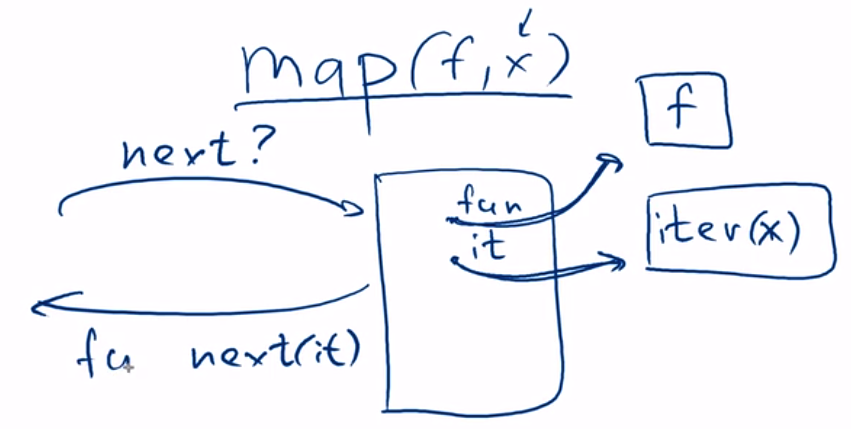

То же самое можно написать с помощью обычного генератора:

In [8]:
x = input().split()
print(x)
n, k = (int(i) for i in x)
print(n + k)

2 3 
['2', '3']
5


-------

Класс **фильтр** принимает 2 аргумента - функция и последовательность. Функция возвращает `True` если элемент последовательности подходит.

In [9]:
x = input().split()
xs = (int(i) for i in x)

def even(x):
    return x % 2 == 0

evens = filter(even, xs)
print(list(evens))

1 2 3 4 5 6 7 8
[2, 4, 6, 8]


`filter` возвращает `filter object`, который является итератором, и внутри него реализован метод `next`.

Если мы поместим итератор в метод `list`, то он соберет в список все элементы итератора.

##     lambda функции

`lambda functions` - синтаксис для создания новых функций.

- Сначала идет ключевое слово `lambda`
- До двоеточия указываем аргументы, которые принимает функция. 

Работают те же правила, что и с обычными функциями, можно с одной \*, с двумя, определить аргументы со значением по умолчанию

- После двоеточия - одно выражение, которое является возвращаемым значением функции.

In [10]:
x = input().split()
xs = (int(i) for i in x)

# def even(x):
#     return x % 2 == 0

even = lambda x: x % 2 == 0

evens = filter(even, xs)
print(list(evens))

1 2  3 4 5 6 7 
[2, 4, 6]


В коде выше сначала создали объект функции с помощью `lambda`.

В `lambda` мы пытаемся одним выражением описать возвращаемое значение. 

Поэтому если в функции сначала что-то вычисляется, то лучше описать это нормальной функцией.

-----------

Еще передаем функцию внутрь другой функции например в сортировке.

Передаем именованный аргумент `key` - передаем туда функцию, которая будет высчитана от всех элементов списка.

In [12]:
x = [
    ('Guido', 'van', 'Rossum'),
    ('Haskell', 'Curry'),
    ('John', 'Backus')
]

def length(name):
    return len(' '.join(name))

name_length = [length(name) for name in x]
print(name_length)

x.sort(key=length)
print(x)

[16, 13, 11]
[('John', 'Backus'), ('Haskell', 'Curry'), ('Guido', 'van', 'Rossum')]


In [14]:
x = [
    ('Guido', 'van', 'Rossum'),
    ('Haskell', 'Curry'),
    ('John', 'Backus')
]



x.sort(key=lambda name: len(' '.join(name)))
print(x)

[('John', 'Backus'), ('Haskell', 'Curry'), ('Guido', 'van', 'Rossum')]


##    Библиотека operator

Иногда нужно представить стандартные операторы в виде функций, например -**+** принимала бы 2 аргумента и возвращала их сумму.

Для этого есть библиотека `operator`.

In [15]:
import operator as op

print(op.add(4, 5))
print(op.mul(4, 5))
print(op.contains([1, 2, 3], 4))

9
20
False


Одними из самых полезных функций являются:
- `itemgetter`, который позволяет достать элемент какой-нибудь коллекции
- `attrgetter`, достающий аттрибут какого-нибудь объекта

In [16]:
x = [1, 2, 3]
# f(x) == x[1]
f = op.itemgetter(1)
print(f(x))

2


In [17]:
x = {'123': 'val'}
# f(x) == x[1]
f = op.itemgetter('123')
print(f(x))

val


In [18]:
# f(x) = x.sort
f = op.attrgetter('sort')
print(f([]))

<built-in method sort of list object at 0x0000024A9A4CD108>


Отсоритруем список по последнему элементу в кортеже:

In [19]:
x = [
    ('Guido', 'van', 'Rossum'),
    ('Haskell', 'Curry'),
    ('John', 'Backus')
]

x.sort(key=op.itemgetter(-1))
print(x)

[('John', 'Backus'), ('Haskell', 'Curry'), ('Guido', 'van', 'Rossum')]


##     functools, partial

Еще одна полезная библиотека для применения в функциях - `functools`

Рассмотрим функцию `partial`.

Она позволяет запомнить некоторые аргументы, с которыми мы бы хотели вызвать функцию, и возвращает функцию, в которую эти аргументы передавать больше не нужно.

Пример: если передаем в конструктор `int()` строку, то можно указать и систему счисления, в которой находится данная строка.

Пусть хотим написать функцию, которая по умолчанию считает, что все числа в строке являются двоичными:

In [20]:
from functools import partial

x = int('1101', base=2)
print(x)

13


Однако мы хотим написать функцию, которая аргументом принимает только одно число, а делала то же самое - вызывает `int()` и указывает аргументом `base=2` 

In [21]:
from functools import partial

x = int('1101', base=2)
print(x)
int_2 = partial(int, base=2)
x = int_2('1101')

13


Функция `partial` берет функцию и частично подставляет какие-то из аргументов и возвращает новую функцию, в которую эти аргументы подставлять больше не нужно.

In [22]:
x = [
    ('Guido', 'van', 'Rossum'),
    ('Haskell', 'Curry'),
    ('John', 'Backus')
]

import operator as op
from functools import partial

sort_by_last = partial(list.sort, key=op.itemgetter(-1))

print(x)
sort_by_last(x)
print(x)

[('Guido', 'van', 'Rossum'), ('Haskell', 'Curry'), ('John', 'Backus')]
[('John', 'Backus'), ('Haskell', 'Curry'), ('Guido', 'van', 'Rossum')]


In [23]:
y = ['abc', 'cba', 'abb']
sort_by_last(y)
print(y)

['cba', 'abb', 'abc']


## Задача 1

Лямбда функции предоставляют нам удобный способ создать функцию «прямо на месте».

Но иногда, когда нужно создавать много однотипных лямбда функций, еще удобнее будет создать функцию, которая будет их генерировать.

Реализуйте функцию `mod_checker(x, mod=0)`, которая будет генерировать лямбда функцию от одного аргумента `y`, которая будет возвращать `True`, если остаток от деления `y` на `x` равен `mod`, и `False` иначе.

**Пример использования:**

```
mod_3 = mod_checker(3)

print(mod_3(3)) # True
print(mod_3(4)) # False

mod_3_1 = mod_checker(3, 1)
print(mod_3_1(4)) # True
```

In [24]:
def mod_checker(x, mod=0):
    return lambda y: y % x == mod

l = [1, 2, 3, 4, 5, 6, 7, 8, 9]
list(filter(mod_checker(3), l))

[3, 6, 9]

# Стиль программирования: pep8 и документация

##    PEP8

Код должен выглядеть стилистически одинаково чтобы его было удобнее читать.

`pep8` - документ по стилистике написания кода.

PEP - Python Enhancement Proposal.

https://www.python.org/dev/peps/pep-0008

##   docstring

Использование документирующих строк для описания 

In [1]:
from random import random

class RandomIterator:
    """
    RandomIteratora(k) -new iterator for k random numbers in [0, 1]
    
    Uses random.random
    """
    def __init__(self, k):
        self.k = k
        self.i = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.i < self.k:
            self.i += 1
            return random()
        else:
            raise StopIteration

Объявляем одну строку, которая является строкой документации.

Используем синтаксис тройных кавычек, т.к. он заключает все, что между ними, в одну строку.

In [2]:
print(RandomIterator.__doc__)


    RandomIteratora(k) -new iterator for k random numbers in [0, 1]
    
    Uses random.random
    


In [7]:
import sys

print(sys.getrefcount.__doc__)

getrefcount(object) -> integer

Return the reference count of object.  The count returned is generally
one higher than you might expect, because it includes the (temporary)
reference as an argument to getrefcount().
